In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
file = r"C:\Users\ASUS\Desktop\cs\SMS\spam.csv"

In [4]:
# import libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# WordCloud for text visualization
from wordcloud import WordCloud

# NLTK for natural language processing
import nltk
from nltk.corpus import stopwords

In [5]:
# Download NLTK data 
nltk.download('stopwords')
nltk.download('punkt')
# punkt for tokenization

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
df = pd.read_csv(file, encoding='latin1')

In [7]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

# Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# Droping unnecessary columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [10]:
# Renaming columns
df.rename(columns = {'v1': 'label', 'v2': 'text'}, inplace=True)

In [11]:
df.head()


label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [12]:
# Converting the label from text to numeric value
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

In [13]:
# Check Missing Value
df.isnull().sum()


label    0
text     0
dtype: int64

In [14]:
# checking duplicate text
df.duplicated().sum()

403

In [15]:
df.drop_duplicates(keep = 'first', inplace = True)


In [16]:
df.duplicated().sum()


0

In [17]:
df.shape



(5169, 2)

# Exploratoty Data Analysis

In [18]:
df['label'].value_counts()


0    4516
1     653
Name: label, dtype: int64

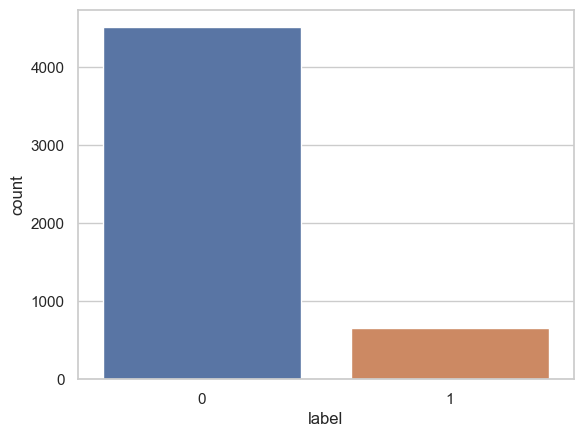

In [19]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.countplot(x=df['label']);

In [20]:
df['total_char'] = df['text'].apply(len)
df['total_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['total_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

label                                               text  total_char  \
0      0  Go until jurong point, crazy.. Available only ...         111   
1      0                      Ok lar... Joking wif u oni...          29   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...         155   
3      0  U dun say so early hor... U c already then say...          49   
4      0  Nah I don't think he goes to usf, he lives aro...          61   

   total_words  total_sentences  
0           24                2  
1            8                2  
2           37                2  
3           13                1  
4           15                1

### Statistics for all messages

In [21]:
summary_columns = ['total_char', 'total_words', 'total_sentences']
df[summary_columns].describe()

total_char  total_words  total_sentences
count  5169.000000  5169.000000      5169.000000
mean     78.977945    18.453279         1.947185
std      58.236293    13.324793         1.362406
min       2.000000     1.000000         1.000000
25%      36.000000     9.000000         1.000000
50%      60.000000    15.000000         1.000000
75%     117.000000    26.000000         2.000000
max     910.000000   220.000000        28.000000

### Statistics for 'Spam' messages

In [22]:
df[df['label'] == 0][summary_columns].describe()


total_char  total_words  total_sentences
count  4516.000000  4516.000000      4516.000000
mean     70.459256    17.120903         1.799601
std      56.358207    13.493725         1.278465
min       2.000000     1.000000         1.000000
25%      34.000000     8.000000         1.000000
50%      52.000000    13.000000         1.000000
75%      90.000000    22.000000         2.000000
max     910.000000   220.000000        28.000000

In [23]:
df[df['label'] == 1][summary_columns].describe()


total_char  total_words  total_sentences
count  653.000000   653.000000       653.000000
mean   137.891271    27.667688         2.967841
std     30.137753     7.008418         1.483201
min     13.000000     2.000000         1.000000
25%    132.000000    25.000000         2.000000
50%    149.000000    29.000000         3.000000
75%    157.000000    32.000000         4.000000
max    224.000000    46.000000         8.000000

# Character Length Distribution


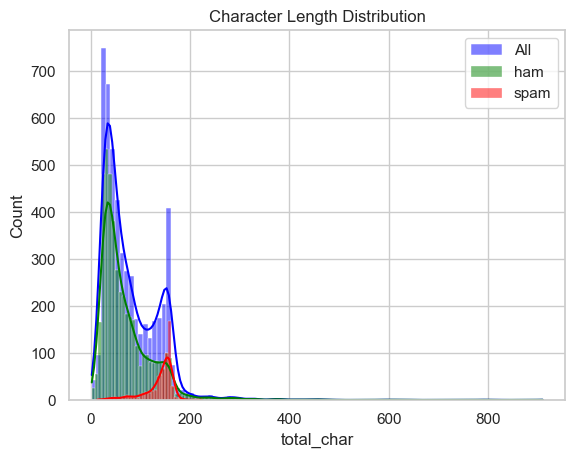

In [24]:
sns.histplot(data=df['total_char'], label='All', color='blue', kde=True)
sns.histplot(data=df[df['label'] == 0]['total_char'], label='ham', color='green', kde=True)
sns.histplot(data=df[df['label'] == 1]['total_char'], label = 'spam', color='red', kde=True)
plt.legend()
plt.title('Character Length Distribution')
plt.show();


# Text Preprocessing

In [25]:
import re
from nltk.stem import PorterStemmer
ps = PorterStemmer()


In [26]:
def text_process(text):
    r = re.sub('[^a-zA-Z]', ' ', text)
    r = r.lower()
    r = r.split()
    r = [ps.stem(word) for word in r if not word in stopwords.words('english')]
    r = " ".join(r)
    return r

df['processed_text'] = df['text'].apply(text_process)
df.head()

label                                               text  total_char  \
0      0  Go until jurong point, crazy.. Available only ...         111   
1      0                      Ok lar... Joking wif u oni...          29   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...         155   
3      0  U dun say so early hor... U c already then say...          49   
4      0  Nah I don't think he goes to usf, he lives aro...          61   

   total_words  total_sentences  \
0           24                2   
1            8                2   
2           37                2   
3           13                1   
4           15                1   

                                      processed_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri wkli comp win fa cup final tkt st m...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though

In [27]:
corpus = []
for text in df['processed_text']:
    corpus.append(text)

# Word Cloud for Spam Messages

In [28]:
spam_text = df[df['label']==1]['processed_text'].str.cat(sep=" ")


In [29]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')


In [30]:
spam_wc = wc.generate(spam_text)


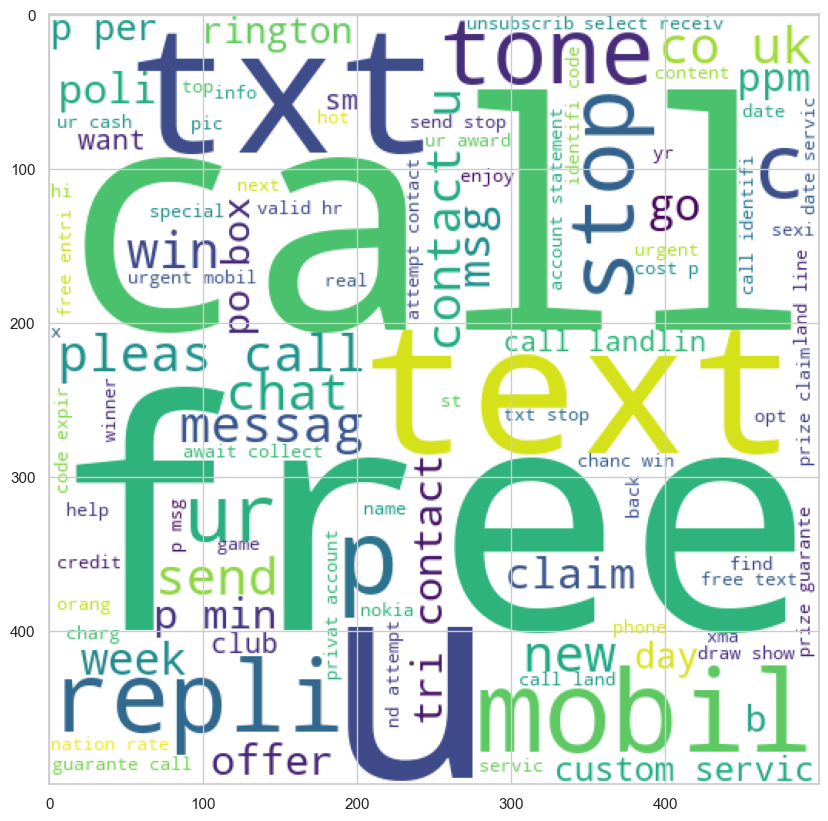

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)
plt.show();


# Word Cloud for Ham Messaged

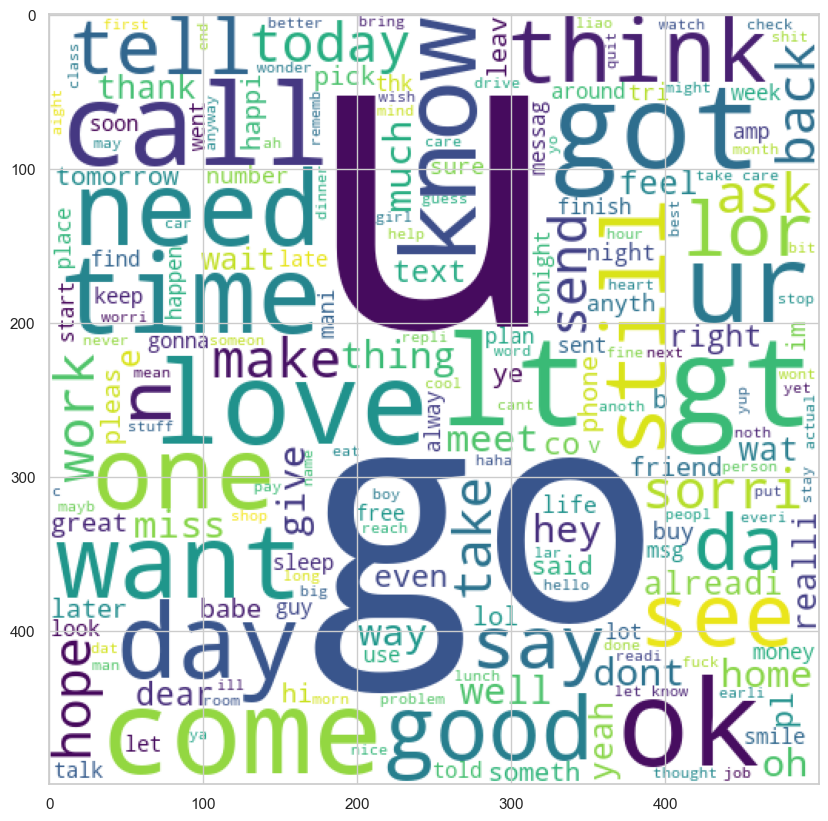

In [32]:
ham_text = df[df['label']==0]['processed_text'].str.cat(sep = " ")
ham_wc = wc.generate(ham_text)

plt.figure(figsize=(10,10))
plt.imshow(ham_wc)
plt.show();


# Find top 20 words for Spam

In [33]:
spam_corpus_words = []
for sent in df[df['label']==1]['processed_text']:
    tokens = nltk.word_tokenize(sent)
    for token in tokens:
        spam_corpus_words.append(token)

In [34]:
from collections import Counter
filter_spam_df = pd.DataFrame(Counter(spam_corpus_words).most_common(20))


In [35]:
filter_spam_df

0    1
0     call  346
1     free  197
2        p  158
3        u  157
4      txt  152
5     text  129
6    mobil  121
7       ur  119
8     stop  114
9    repli  104
10   claim   98
11   prize   85
12     www   83
13     min   78
14     get   75
15    tone   73
16    cash   65
17  servic   65
18     new   64
19      uk   63

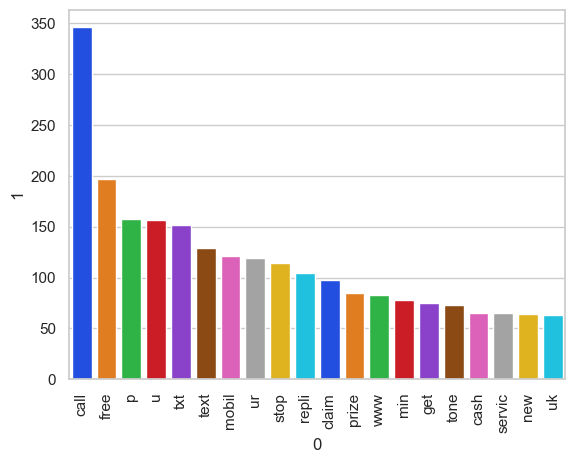

In [36]:
sns.barplot(data = filter_spam_df, x = filter_spam_df[0], y = filter_spam_df[1], palette='bright')
plt.xticks(rotation = 90)
plt.show();

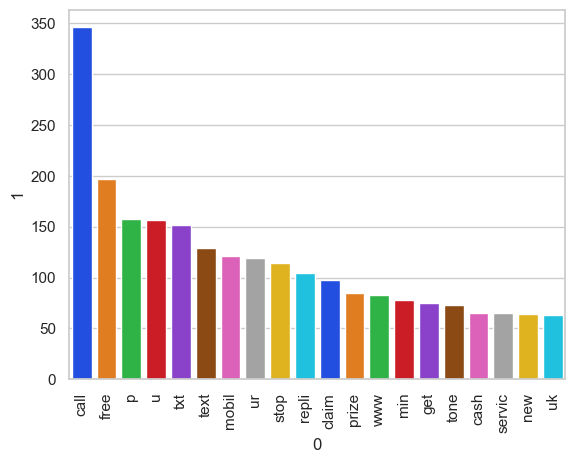

In [37]:
sns.barplot(data = filter_spam_df, x = filter_spam_df[0], y = filter_spam_df[1], palette='bright')
plt.xticks(rotation = 90)
plt.show();

In [38]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
!pip install xgboost 
from xgboost import XGBClassifier

In [39]:
# initialization of the models
lr_clf = LogisticRegression()
svm_clf = SVC(kernel='sigmoid')
mn_clf = MultinomialNB()
rf_clf = RandomForestClassifier()
adb_clf = AdaBoostClassifier()
xgb_clf = XGBClassifier()

In [40]:
classifiers = [lr_clf, svm_clf, mn_clf, rf_clf, adb_clf, xgb_clf]


In [41]:
# Import traing test split and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score


In [42]:
y = df['label'].values
y


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

# Vectorization

# Bag-of-Words and Tfidf

In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [44]:
X_bow = cv.fit_transform(df['processed_text']).toarray()
X_tfidf = tfidf.fit_transform(df['processed_text']).toarray()


### Training with BoW/Tfidf vectorization

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.30, random_state=42)

In [46]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    print(clf)
    print(f'-----------')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'-------------------------------------------')
    

LogisticRegression()
-----------
Accuracy: 0.9522888459058672
Precision: 0.9620253164556962
-------------------------------------------
SVC(kernel='sigmoid')
-----------
Accuracy: 0.97678916827853
Precision: 0.96
-------------------------------------------
MultinomialNB()
-----------
Accuracy: 0.9580915538362347
Precision: 1.0
-------------------------------------------
RandomForestClassifier()
-----------
Accuracy: 0.9729206963249516
Precision: 0.989010989010989
-------------------------------------------
AdaBoostClassifier()
-----------
Accuracy: 0.968407479045777
Precision: 0.9211822660098522
-------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
         

# Vectorization with Word2Vec

In [47]:
word_corpus = []
for sent in df['processed_text']:
    # from sentence to words -> word_tokenize
    tokens = nltk.word_tokenize(sent)
    for token in tokens:
        word_corpus.append(token)


In [48]:
from gensim.models import Word2Vec

# initialize the model
model = Word2Vec(window = 5, min_count= 2)
model.build_vocab(word_corpus)

# train the model
model.train(word_corpus, total_examples=model.corpus_count, epochs=10)

(333479, 1922070)

In [49]:
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]

    # check if the document is empty
    if not doc:
        # return a zero vector if the document is empty
        return np.zeros(model.vector_size)

    # return the average of the word vectors in the document
    return np.mean(model.wv[doc], axis=0)

In [50]:
df['processed_text'].values[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [51]:
document_vector(df['processed_text'].values[0])

array([ 0.03262351,  0.00499617,  0.07844697,  0.13057573, -0.07511081,
       -0.08109424,  0.18323392,  0.12028931, -0.1632119 , -0.09035976,
        0.13245077, -0.04507779, -0.03449361,  0.1922256 , -0.00406675,
       -0.01106815,  0.01315386,  0.23561746, -0.19524942, -0.2237072 ,
        0.03535959,  0.04151572,  0.25596708,  0.08741696,  0.12766314,
        0.01071842,  0.01633918, -0.11866465, -0.12571146, -0.02724088,
        0.03293412,  0.03203572,  0.13440728, -0.05572302,  0.00414828,
        0.05783862,  0.0547642 , -0.09675657, -0.02733115, -0.20042287,
       -0.03012814, -0.15348   , -0.17440921, -0.01312383,  0.02957793,
        0.01296138, -0.17284423, -0.03524031,  0.03539259,  0.03926919,
       -0.05098091, -0.26653317, -0.19206612,  0.02512804, -0.04785785,
       -0.00772202,  0.07920471, -0.26970336, -0.17845848,  0.03734806,
       -0.0261097 , -0.05648796,  0.21458153, -0.1114437 , -0.16291177,
        0.29798624, -0.09175293,  0.1061082 , -0.19454998,  0.02

In [52]:
from tqdm import tqdm

X = []
for doc in tqdm(df['processed_text'].values):
    v = document_vector(doc)
    X.append(document_vector(doc))

100%|███████████████████████████████████████████████████████████████████████████| 5169/5169 [00:00<00:00, 50035.21it/s]


In [53]:
X = np.array(X)


In [54]:
X.shape


(5169, 100)

In [55]:
# check y
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

# ML model on Word2Vec Vectorization

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [57]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8994197292069632